## **Project Name**

##### **Project Type**    - EDA - AirBnB
##### **Contribution**    - Individual
##### **Name**            - Mohd Tabish Khan


# **Project Summary**
##### AirBnB data analysis is very important as it helps in recognising the key factor for understanding the behvaiour of the guests.

##### Airbnb connects people who have a place to rent and people who need a place to stay. It has become so popular and successful that most of us consider Airbnb as an option in our travel plans.

##### There are several factors that play a key role in defining the price of a place. Hosts are expected to list a reasonable price for their places.

##### On the other hand, people who look for a place to stay evaluate the listings with regards to several features such as location, size, amenities, and most importantly the price.

# **Business Objective**
##### Providing better services to the guests.



# **Let's Begin**

## Importing Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

drive.mount("/content/drive")

Mounted at /content/drive


## Loading Dataset

In [3]:
working_dir_path = "/content/drive/MyDrive/Colab_Notebooks/Almabetter/Module 1/Capstone EDA Project - Airbnb/"
df = pd.read_csv(working_dir_path + "Airbnb NYC 2019.csv")

### Dataset First View

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [5]:
df.shape

(48895, 16)

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Converting last_review varibale to datetime variable

In [7]:
df['last_review'] = pd.to_datetime(df['last_review'], format= '%Y/%m/%d')
df['year'] = df['last_review'].dt.year

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
year                              10052
dtype: int64


#### Removing the rows with misisng values

In [10]:
df.dropna(axis = 0 , how = 'any', inplace = True)

<Axes: >

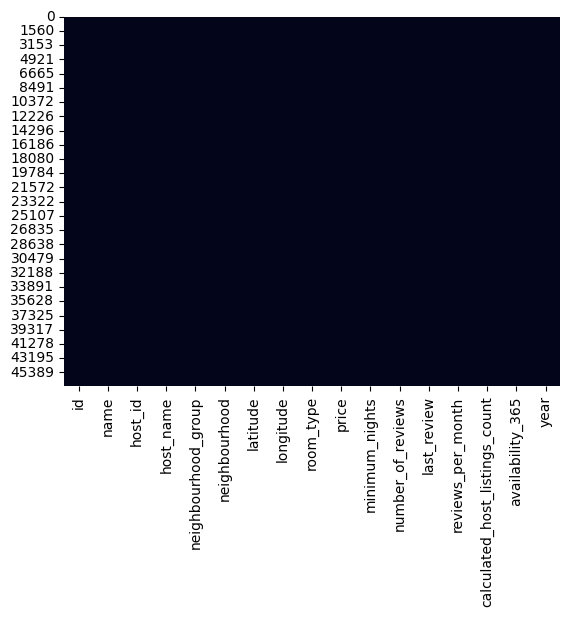

In [11]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

At Airbnb, guests search for homes around the world to stay in on their travels. We use data from the Almabetter learning team to find ways in which we can help guests find listings, and better design the site user experience.

The work of the Data Science team at Airbnb is challenging. We are a two sided marketplace, with heavy seasonality and variation by cities across the globe. Discerning signal from noise and extracting the right stories from the vast amount of data we get is complicated by many of these factors.

We’re always looking for ways to improve our methods for addressing this challenge, so we want to share some of the work we do with the broader data science community. This pathways visualization problem is an opportunity for you to explore real behavioral data and help us understand its trends more clearly.

This dataset has 48895 rows and 16 columns There are no duplicate value and missing value as we had dropped them.


## ***2. Understanding Your Variables***

In [12]:
# Dataset columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year'],
      dtype='object')

In [13]:
# include = 'all' will provide us a good view of the statistical values such as count, min, max, std etc.
df.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
count,3.882100e+04,38821,3.882100e+04,38821,38821,38821,38821.000000,38821.000000,38821,38821.000000,38821.000000,38821.000000,38821,38821.000000,38821.000000,38821.000000,38821.000000
unique,NaN,38253,NaN,9885,5,218,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN,NaN
top,NaN,Home away from home,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,335,16621,3163,NaN,NaN,20321,NaN,NaN,NaN,1413,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00,NaN,NaN,NaN,NaN
mean,1.810081e+07,NaN,6.424582e+07,NaN,NaN,NaN,40.728129,-73.951149,NaN,142.332526,5.869220,29.290255,NaN,1.373229,5.166611,114.886299,2018.288323
std,1.069372e+07,NaN,7.589752e+07,NaN,NaN,NaN,0.054991,0.046693,NaN,196.994756,17.389026,48.182900,NaN,1.680328,26.302954,129.529950,1.180598
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,0.000000,1.000000,1.000000,NaN,0.010000,1.000000,0.000000,2011.000000
25%,8.721444e+06,NaN,7.029525e+06,NaN,NaN,NaN,40.688640,-73.982460,NaN,69.000000,1.000000,3.000000,NaN,0.190000,1.000000,0.000000,2018.000000


### **Variable Description**

**ID                           :** Guests ID

**Name                         :** Name of the guests

**Host_ID                      :** Host ID

**Host_Name                    :** Host Name

**Neighbourhood_group          :** Location

**Neighbourhood                :** Area

**Latitude                     :** Latitude Range

**Longitude                    :** Longitude range

**Room_type                    :** Type of listing

**Price                        :** Price of listing

**Minimum_Nights               :** Minimum nights to be paid for

**Number_of_reviews            :** Number of reviews

**Last_review                  :** Content of the last review

**Reviews_per_month            :** Number of the checks per month

**Calculated_host_listings     :** Total count

**Availability_365             :** Availability per year


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 38821 .
No. of unique values in  name is 38253 .
No. of unique values in  host_id is 30232 .
No. of unique values in  host_name is 9885 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 218 .
No. of unique values in  latitude is 17436 .
No. of unique values in  longitude is 13639 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 581 .
No. of unique values in  minimum_nights is 89 .
No. of unique values in  number_of_reviews is 393 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .
No. of unique values in  year is 9 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=df.host_id.value_counts().head(10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,207
1,61391963,79
2,16098958,61
3,137358866,51
4,7503643,49
5,190921808,46
6,30283594,43
7,1475015,42
8,120762452,40
9,2119276,39


In [16]:
# Based on room-type checking the number of reviews
df.groupby('room_type')['reviews_per_month'].count().reset_index()

,room_type,reviews_per_month
0,Entire home/apt,20321
1,Private room,17654
2,Shared room,846


##### **As we can see from above the entire home/apt are getting more number of guest per month.**

##### Checking the number of reviews based on neighbourhood group

In [17]:
df.groupby('neighbourhood_group')['reviews_per_month'].count().reset_index()

,neighbourhood_group,reviews_per_month
0,Bronx,875
1,Brooklyn,16439
2,Manhattan,16621
3,Queens,4572
4,Staten Island,314


##### Based on location, we can see Manhattan is most favourite neighbourhood of the guests.

In [18]:
# Minimum number of nights spent in the location
df.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()

,neighbourhood_group,minimum_nights
0,Bronx,3.932571
1,Brooklyn,5.320153
2,Manhattan,7.013477
3,Queens,4.222441
4,Staten Island,3.420382


In [19]:
# Minimum number of nights spent in the room_type
df.groupby('room_type')['minimum_nights'].mean().reset_index()

,room_type,minimum_nights
0,Entire home/apt,7.084691
1,Private room,4.540614
2,Shared room,4.398345


In [20]:
# Checking average price based on room-type.
df.groupby('room_type')['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,196.315929
1,Private room,83.985272
2,Shared room,63.213948


In [21]:
# Checking average price based on neighbourhood-group.
df.groupby('neighbourhood_group')['price'].mean().reset_index()

,neighbourhood_group,price
0,Bronx,79.558857
1,Brooklyn,121.463289
2,Manhattan,180.071596
3,Queens,95.783683
4,Staten Island,89.964968


In [22]:
# Checking average price for both room_type and location
df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,120.938312
1,Bronx,Private room,57.093511
2,Bronx,Shared room,56.930233
3,Brooklyn,Entire home/apt,171.281897
4,Brooklyn,Private room,73.349562
5,Brooklyn,Shared room,45.458621
6,Manhattan,Entire home/apt,230.200964
7,Manhattan,Private room,106.607488
8,Manhattan,Shared room,77.980337
9,Queens,Entire home/apt,139.225603


### Checking for which month the guests booked the most

In [23]:
df['month'] = df['last_review'].dt.month

In [24]:
df.groupby('month')['minimum_nights'].count().reset_index()

,month,minimum_nights
0,1,2766
1,2,770
2,3,1288
3,4,2109
4,5,4700
5,6,13586
6,7,5933
7,8,1663
8,9,1535
9,10,1545


### From the above it is clearly visible that the guest prefer the month of June as it might be due to summers.

In [25]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333,2019.0,7
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293,2019.0,6
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342,2019.0,6
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339,2019.0,6
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173,2019.0,6
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163,2019.0,7
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179,2019.0,7
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341,2019.0,7
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269,2019.0,7
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0,2019.0,7


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Bar chart to check the top host

[Text(0, 0, '1475015'),
 Text(1, 0, '2119276'),
 Text(2, 0, '7503643'),
 Text(3, 0, '16098958'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '120762452'),
 Text(7, 0, '137358866'),
 Text(8, 0, '190921808'),
 Text(9, 0, '219517861')]

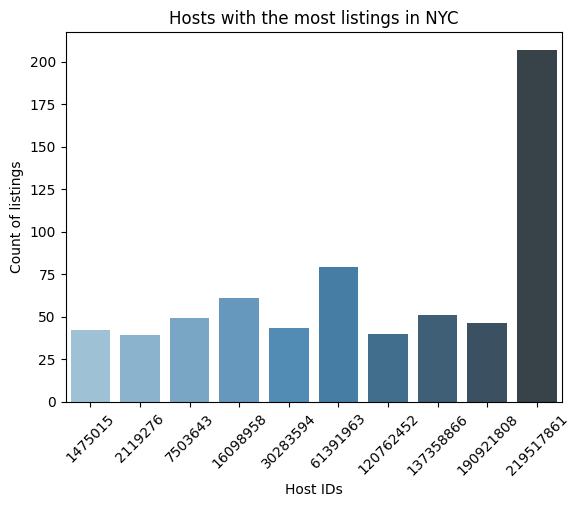

In [26]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##### The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.

##### Interesting, we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.



<Axes: xlabel='room_type', ylabel='price'>

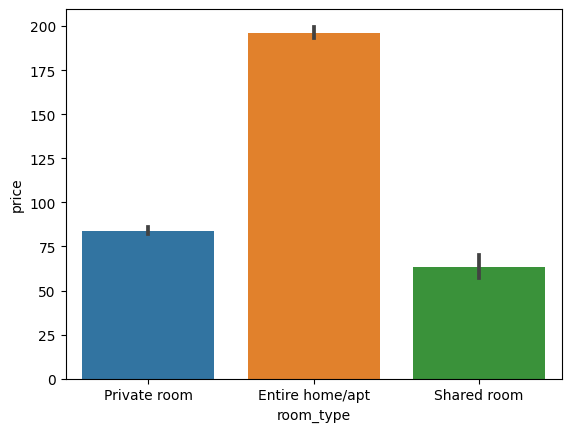

In [27]:
sns.barplot(data = df, x = 'room_type', y = "price")

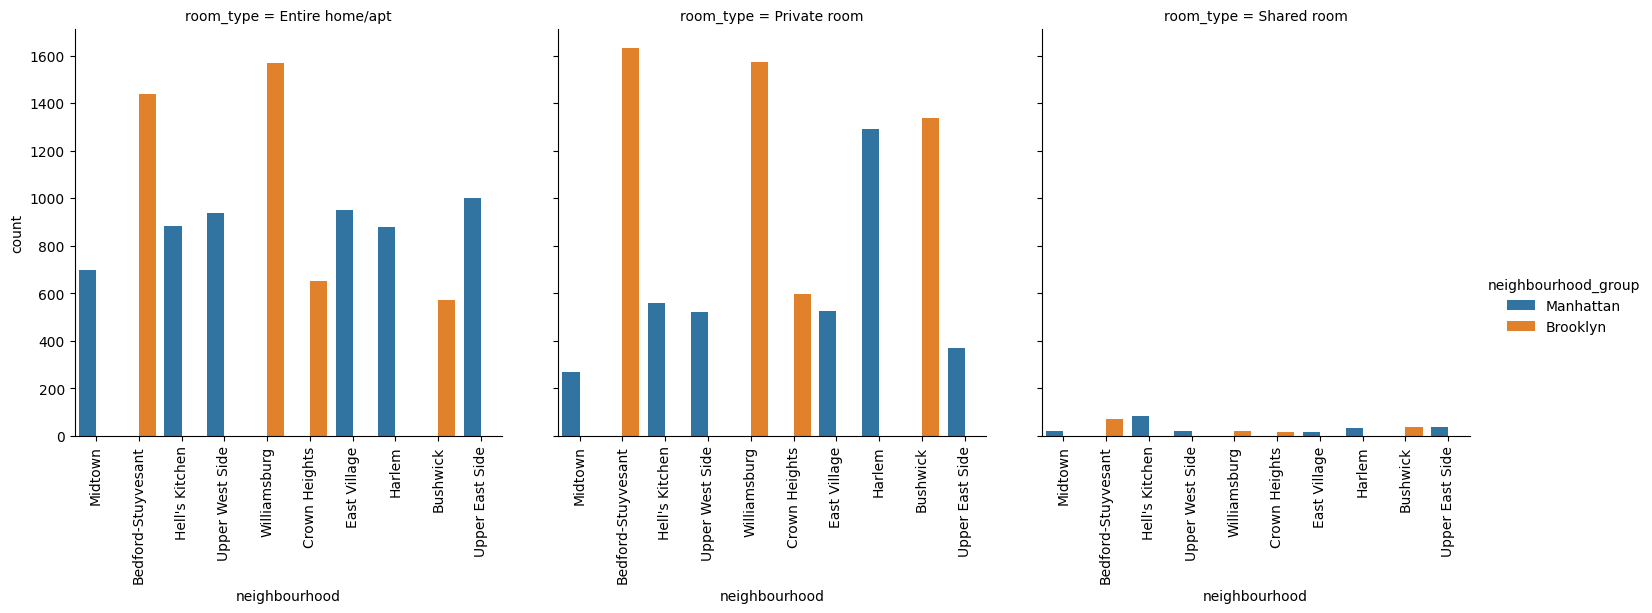

In [28]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

##### 1. Why did you pick the specific chart?

##### Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### To show which locality and room-type are getting more guests, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

##### In locality Manhattan is popular and in room-type guests are preferring entire home/apt over others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### We know that while travelling we prefer the guest prefer home like exprience so the entire home/apt are getting more guests which is impactin the business in a positive way. Also, the top host have more listing than the others due to which are getting more guests so the more the listing the higher the guests count.

##### Amazing, but let' breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

In [29]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [30]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,10.0,10.0,13.0,0.0
25%,60.0,90.0,50.0,50.0,45.0
50%,94.0,140.0,72.0,75.0,65.0
75%,150.0,200.0,109.0,105.0,95.0
max,10000.0,9999.0,10000.0,625.0,800.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

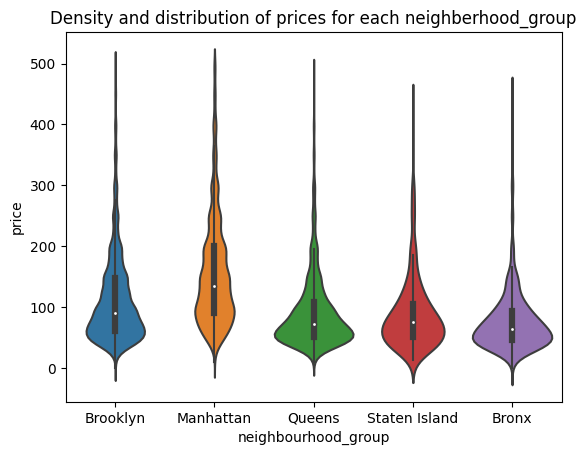

In [31]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

##### Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night.
##### Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.



### Histogram chart on the price variable

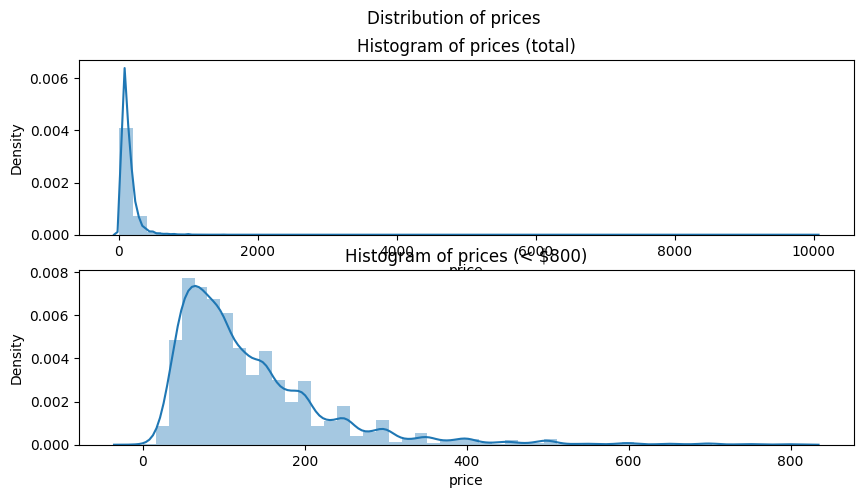

In [32]:
fig, ax= plt.subplots(2,1, figsize=(10,5))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(df['price'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of prices (< $800)")
sns.distplot(df[df['price'] < 800]['price'], kde=True, ax=ax[1])



fig.suptitle("Distribution of prices")
fig.show()

##### 1. Why did you pick the specific chart?

##### The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

##### Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not. I used Histogram and which helped me to get the density distribution of the price.

##### 2. What is/are the insight(s) found from the chart?

##### The histogram shows us how the cheap AirBnB are getting more guests than the expensive onse.


##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

##### The histogram shows the price should be less in order to get more guests.


## Checking Seasonality

<Axes: xlabel='year', ylabel='number_of_reviews'>

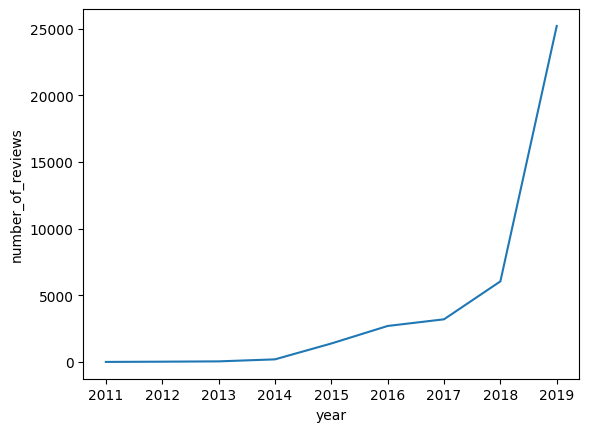

In [33]:
df_year = df.groupby('year')['number_of_reviews'].count().reset_index()
sns.lineplot(data= df_year,x ="year" , y ="number_of_reviews", legend = "auto" )

##### 1. Why did you pick the specific chart?

##### The line plot is most commonly used to show the increment of the distribution of the value of variable.

##### I have used to check the popularty of the AirBnB.

##### 2. What is/are the insight(s) found from the chart?

#####  It is clearly visible from the line chart that the AirBnB is getting more popular over the years.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

##### The line chart shows that AirBnB is getting year by year.

<Axes: xlabel='neighbourhood_group', ylabel='reviews_per_month'>

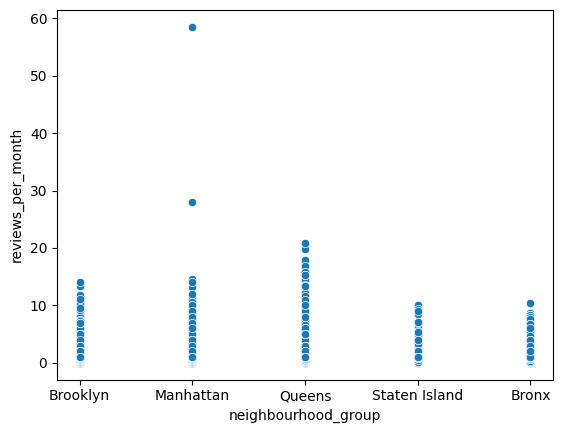

In [34]:
sns.scatterplot(df, x = "neighbourhood_group", y = "reviews_per_month")

In [35]:
# Correlation Heatmap visualization code
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month
id,1.00,0.59,-0.01,0.10,-0.01,-0.07,-0.33,0.29,0.10,0.01,0.41,-0.05
host_id,0.59,1.00,0.01,0.14,0.01,-0.05,-0.14,0.30,0.15,0.16,0.27,-0.03
latitude,-0.01,0.01,1.00,0.09,0.03,0.02,-0.01,-0.01,0.00,-0.02,-0.02,-0.00
longitude,0.10,0.14,0.09,1.00,-0.16,-0.06,0.05,0.15,-0.09,0.10,0.10,0.00
price,-0.01,0.01,0.03,-0.16,1.00,0.03,-0.04,-0.03,0.05,0.08,-0.02,0.00
minimum_nights,-0.07,-0.05,0.02,-0.06,0.03,1.00,-0.07,-0.12,0.07,0.10,-0.05,-0.01
number_of_reviews,-0.33,-0.14,-0.01,0.05,-0.04,-0.07,1.00,0.55,-0.06,0.19,0.27,-0.01
reviews_per_month,0.29,0.30,-0.01,0.15,-0.03,-0.12,0.55,1.00,-0.01,0.19,0.42,0.00
calculated_host_listings_count,0.10,0.15,0.00,-0.09,0.05,0.07,-0.06,-0.01,1.00,0.18,0.05,-0.03
availability_365,0.01,0.16,-0.02,0.10,0.08,0.10,0.19,0.19,0.18,1.00,0.31,-0.03


##### 1. Why did you pick the specific chart?

##### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

##### Thus to know the correlation between all the variables along with the correlation coeficients, I used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

##### From the above correlation heatmap, we can see id, host_id, number of reviews are positively co-related with reviews_per_month.Price is also positively co-related with number of reviews.

##### Rest all correlation can be depicted from the above chart.

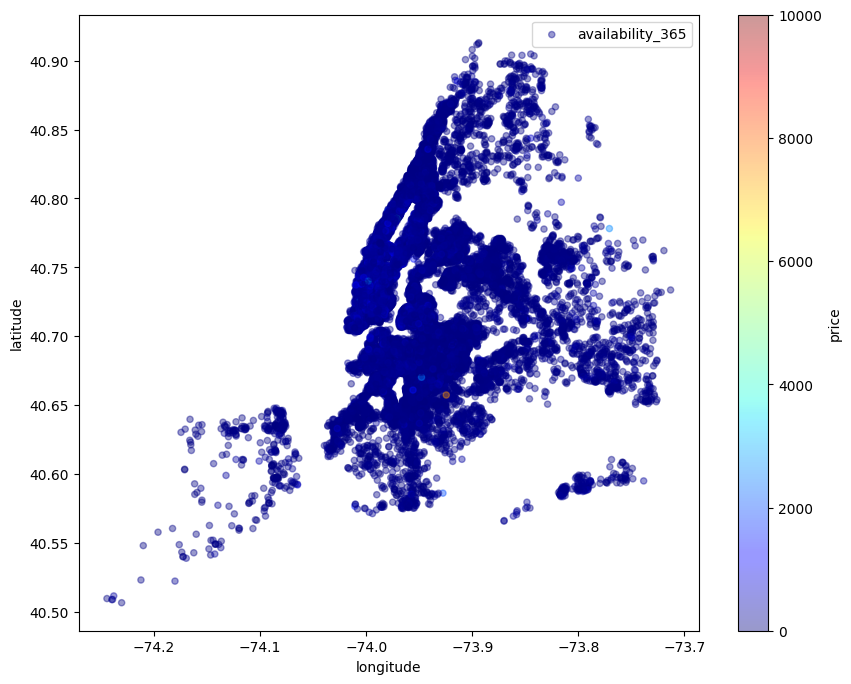

In [36]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out
viz_4=df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

#####1.  Why did you pick the specific chart?

##### A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

##### Thus, I have used the scatter plot to depict the relationship between longitude and latitude of the chart.

##### 2. What is/are the insight(s) found from the chart?

##### Good, scatterplot worked just fine to output our latitude and longitude points. However, it would be nice to have a map below for fully immersive heatmap in ourcase - let's see what we can do!

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

**Solution to Increase AirBnB booking**

#####- More entire house/Apt will increase the number of guests.
#####- Prices should be decrease or any discount or offer should be provided to the guest.
#####- The host should list more to get the more guest.
#####- Guest prefer Manhattan more so we should provide more listing there.
#####- Offer should be provided in the month of June as people prefer travelling in the month of June.


# **Conclusion**

##### This Airbnb dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more.